# Zbiór danych Fashion MNIST składa się z 70 000 obrazów zawierających elementy ubioru podzielone na 10 klas, każdy obraz zawiera etykietę określającą zawartą na nim część garderoby. Należy zbudować perceptron wielowarstwowy do klasyfikacji obrazów Fashion MNIST.

Zbiór treningowy składa się z 60 000 obrazów, a zbiór testowy z 10 000 obrazów. Każdy obraz jest czarno-biały i ma rozmiar 28x28 pikseli.

# **IMPORT ODPOWIEDNICH BIBLIOTEK**

In [2]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# **WCZYTANIE ZBIORU DANYCH**

In [4]:
data = tf.keras.datasets.fashion_mnist.load_data()

Przy korzystaniu z aglorytmów uczenia maszynowego do rozwiązywania problemów klasyfikacji i regresji, dane były dzielone na dwa zbiory: treningowy i testowy. Tym razem dane należy podzielić na trzy zbiory: uczący, walidacyjny i testowy. Zbiór uczący wykorzystywany jest do treningu modelu, a testowy do jego ewaluacji. Zbiór walidacyjny posłuży do ewaluacji sieci neuronowej podczas treningu. Zbiór Fashion MNIST jest podzielony na zbiór uczący i testowy, natomiast wyodrębnimy 5000 obrazów ze zbioru treningowego do walidacji

In [6]:
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist

# Załaduj dane Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Podziel dane treningowe na zbiór uczący, walidacyjny i testowy
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=5000, random_state=42)

# Sprawdź rozmiary zbiorów
print("Rozmiar zbioru uczącego:", len(x_train))
print("Rozmiar zbioru walidacyjnego:", len(x_valid))
print("Rozmiar zbioru testowego:", len(x_test))

Rozmiar zbioru uczącego: 55000
Rozmiar zbioru walidacyjnego: 5000
Rozmiar zbioru testowego: 10000


Wyświetlenie kilkunastu obrazów

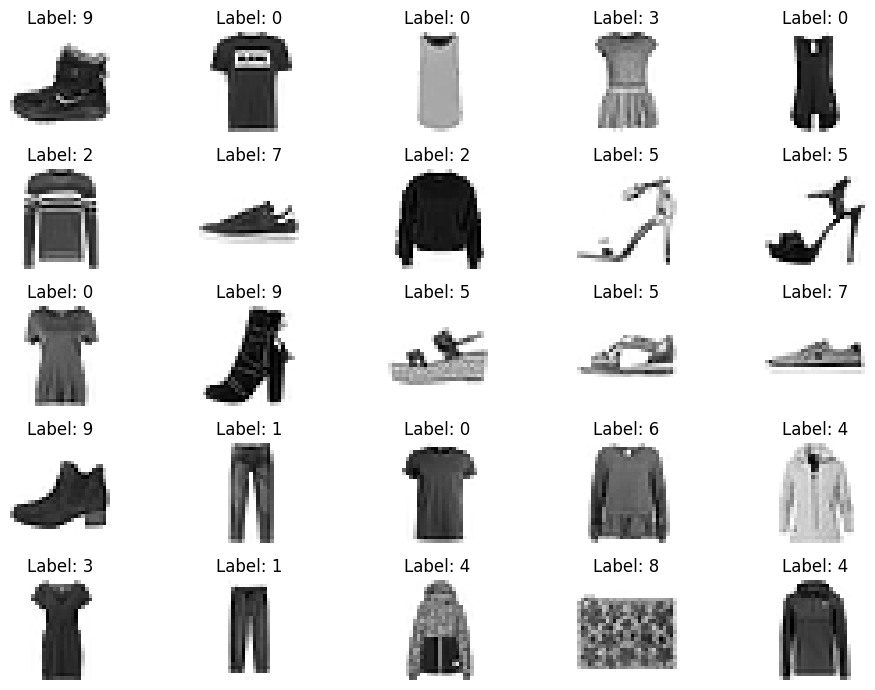

# **DATA PREPROCESSING**

**Normalizacja** odcienia pikseli do zakresu [0,1] -> dzielenie przez 255.0

In [7]:
# Normalizacja danych pikseli do zakresu [0,1]
x_train_normalized = x_train / 255.0
x_valid_normalized = x_valid / 255.0
x_test_normalized = x_test / 255.0

**Reshaping** (przekształcenie danych). Każdy obraz ma rozmiar 28x28 pikseli i jest czarno-biały. Należy utworzyć macierz 3D -> 28 x 28 x 1 (informacja o kanale koloru)

In [8]:
# Przekształcenie danych do macierzy 3D
x_train_reshaped = x_train_normalized.reshape((len(x_train_normalized), 28, 28, 1))
x_valid_reshaped = x_valid_normalized.reshape((len(x_valid_normalized), 28, 28, 1))
x_test_reshaped = x_test_normalized.reshape((len(x_test_normalized), 28, 28, 1))

Stworzenie listy nazw 10 klas lub kodowanie gorącojedynkowe "One Hot"

In [9]:
from keras.utils import to_categorical

# Zakoduj etykiety klas za pomocą One-Hot Encoding
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_valid_one_hot = to_categorical(y_valid, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# **TWORZENIE MODELU**

# **ANN vs CNN**

W ANN wszystkie neurony są połączone, natomiast w CNN neurony są połączone do wybranych neuronów (lokalnych) w kolejnej warstwie. Sieci CNN - najistotniejszy składnik to warstwa splotowa (konwolucyjna) zawierająca filtry (kernele) wyodrębniające cechy odróżniające od siebie różne obrazy.




Hiperparametry warstwy konwolucyjnej:
*   Kernel Size (rozmiar jądra)- rozmiar filtra,
*   Padding (wypełnienie/uzupełnianie) - obramowanie obiektu, umożliwia otrzymanie rozmiaru wyjścia takiego samego jak rozmiar wejścia (dodanie dodatkowych wag na krawędziach uzupełnionych najczęściej zerami),
*   Strides (kroki) - odległość w poziomie lub w pionie o ile pikseli ma być przesunięte jądro (krok przesunięcia okna filtra),

Warstwa łącząca (Pooling Layer) ma na celu podpróbkowanie obrazu wejściowego w celu zredukowania obciążenia obliczeniowego, wykorzystania pamięci i liczby parametrów. Np. kilka pikseli 2x2 mapuje się na 1 piksel. Rodzaje poolingu:
*   max (maksymalna wartość z pikseli)
*   avg (średnia wartość z pikseli)

# Model 1
Prosta sieć CNN składająca się z jednej warstwy konwolucyjnej z filtrem 3×3, a następnie maksymalizującą warstwą łączącą. Następnie dane wejściowe muszą zostać spłaszczone i przepuszczone przez warstwę gęstą.

Model sekwencyjny:
*   **Pierwsza warstwa (DefaultConv2D)**: zawiera 64 filtry 3x3, która korzysta z funkcji aktywacji ReLU, parametry obrazu -> input_shape = [28,28,1],
*   **Maksymalizująca warstwa łącząca (MaxPool2D)** zawierającą jądro o rozmiarze domyślnym 2 (obraz zostaje zmniejszony o połowę w każdym wymiarze przestrzeni),
*   Warstwa porzucenia (Dropout) dla 25% połączeń,

*   Warstwa spłaszczona (Flatten),

*   Warstwa ukryta gęsta (Dense) składająca się z 128 jednostek, która korzysta z funkcji aktywacji ReLU,
*   **Warstwa wyjściowa** gęsta (Dense) składająca się z 10 jednostek z wyznaczoną funkcją aktywacji softmax


In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Utworzenie modelu sekwencyjnego
model = Sequential()

# Pierwsza warstwa konwolucyjna (DefaultConv2D)
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Maksymalizująca warstwa łącząca (MaxPool2D)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Warstwa porzucenia (Dropout)
model.add(Dropout(0.25))

# Warstwa spłaszczona
model.add(Flatten())

# Warstwa ukryta gęsta (Dense)
model.add(Dense(128, activation='relu'))

# Warstwa wyjściowa gęsta (Dense) z funkcją aktywacji softmax
model.add(Dense(10, activation='softmax'))

# Wyświetlenie architektury modelu
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                      

# **KOMPILOWANIE MODELU**

*  funkcja straty: categorical_crossentropy,
*  optymalizator: adam
*  wskaźnik: accuracy


In [11]:
# Kompilacja modelu
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# **TRENOWANIE MODELU**

Należy wywołać metodę fit():

*   Cechy wejściowe (X_train)
*   Klasy docelowe (y_train)
*   Liczba epok (epochs) = 50
*   Batch_size = 256
*   Przebieg walidacyjny

In [12]:
# Importy
from keras.callbacks import ModelCheckpoint

# Ustawienie funkcji checkpoint, aby zapisać najlepszy model na podstawie monitorowanej metryki (accuracy)
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

# Wywołanie metody fit
history = model.fit(
    x_train_reshaped,  # Cechy wejściowe
    y_train_one_hot,   # Klasy docelowe
    epochs=50,         # Liczba epok
    batch_size=256,    # Rozmiar batcha
    validation_data=(x_valid_reshaped, y_valid_one_hot),  # Przebieg walidacyjny
    callbacks=[checkpoint]  # Dodanie funkcji checkpoint
)

Epoch 1/50


215/215 [==============================] - ETA: 0s - loss: 0.4892 - accuracy: 0.8281
Epoch 1: val_accuracy improved from -inf to 0.88260, saving model to best_model.h5
215/215 [==============================] - 55s 250ms/step - loss: 0.4892 - accuracy: 0.8281 - val_loss: 0.3310 - val_accuracy: 0.8826
Epoch 2/50
215/215 [==============================] - ETA: 0s - loss: 0.3152 - accuracy: 0.8878
Epoch 2: val_accuracy improved from 0.88260 to 0.89760, saving model to best_model.h5
215/215 [==============================] - 42s 196ms/step - loss: 0.3152 - accuracy: 0.8878 - val_loss: 0.2916 - val_accuracy: 0.8976
Epoch 3/50
215/215 [==============================] - ETA: 0s - loss: 0.2734 - accuracy: 0.9026
Epoch 3: val_accuracy did not improve from 0.89760
215/215 [==============================] - 54s 250ms/step - loss: 0.2734 - accuracy: 0.9026 - val_loss: 0.2831 - val_accuracy: 0.8924
Epoch 4/50
215/215 [==============================] - ETA: 0s - loss: 0.2530 - accuracy:

# **KRZYWE UCZENIA**

Należy wykorzystać słownik (history.history). Krzywe uczenia: średnia funkcja straty uczenia i dokładność zmierzone w każdej epoce dla zestawu treningowego i walidacyjnego

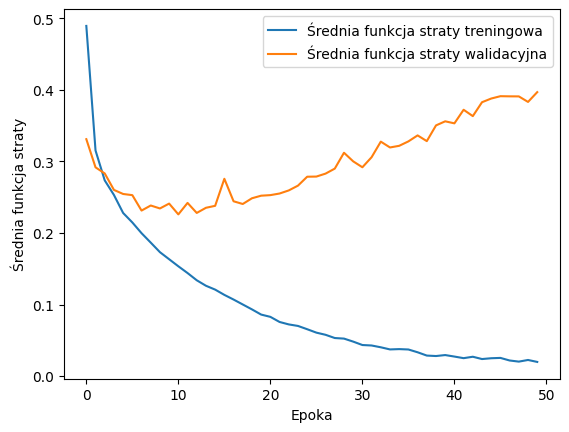

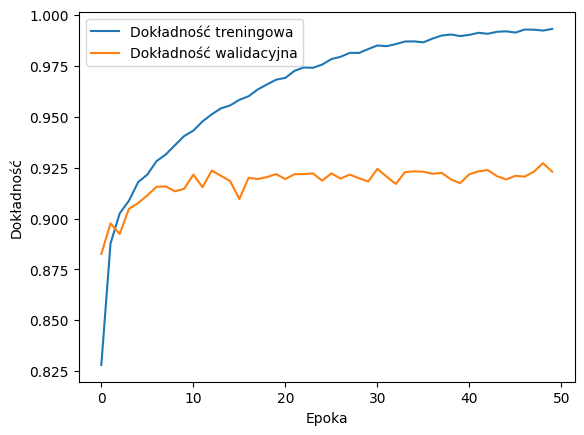

In [14]:
import matplotlib.pyplot as plt

# Pobranie historii uczenia
training_history = history.history
# Wykres średniej funkcji straty
plt.plot(training_history['loss'], label='Średnia funkcja straty treningowa')
plt.plot(training_history['val_loss'], label='Średnia funkcja straty walidacyjna')
plt.xlabel('Epoka')
plt.ylabel('Średnia funkcja straty')
plt.legend()
plt.show()

# Wykres dokładności
plt.plot(training_history['accuracy'], label='Dokładność treningowa')
plt.plot(training_history['val_accuracy'], label='Dokładność walidacyjna')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()
plt.show()

# **OCENA MODELU**

In [15]:
# Ocena modelu na zbiorze testowym
loss, accuracy = model.evaluate(x_test_reshaped, y_test_one_hot)

# Wyświetlenie wyników
print("Średnia funkcja straty na zbiorze testowym:", loss)
print("Dokładność na zbiorze testowym:", accuracy)

313/313 [==============================] - 3s 8ms/step - loss: 0.4387 - accuracy: 0.9191
Średnia funkcja straty na zbiorze testowym: 0.43868598341941833
Dokładność na zbiorze testowym: 0.9190999865531921


# **PROGNOZY MODELU**

In [16]:
# Prognozy modelu na zbiorze testowym
predictions = model.predict(x_test_reshaped)

# Wypisanie pierwszych kilku prognoz
print("Przykładowe prognozy:")
print(predictions[:5])

# Konwersja prognoz do etykiet klas
predicted_labels = predictions.argmax(axis=1)

# Wypisanie przewidzianych etykiet dla kilku przykładów
print("Przewidziane etykiety:")
print(predicted_labels[:5])

313/313 [==============================] - 3s 7ms/step
Przykładowe prognozy:
[[1.8210714e-14 4.7803462e-25 4.7771550e-14 3.4794073e-20 4.1291159e-17
  3.5813826e-12 1.1591227e-22 2.0773977e-10 4.4492878e-16 1.0000000e+00]
 [1.7795956e-14 4.1051813e-24 1.0000000e+00 1.0600880e-18 7.2939786e-15
  3.2637889e-29 2.3912900e-13 1.2585183e-22 5.6117935e-27 2.5162914e-24]
 [4.7599731e-22 1.0000000e+00 2.3948383e-19 2.7985911e-18 5.1860838e-19
  9.6452581e-26 1.2602039e-23 1.0485537e-25 1.2243101e-15 1.5807302e-28]
 [5.0240952e-17 1.0000000e+00 9.0882180e-21 5.7332775e-17 3.7200200e-14
  6.3114382e-26 1.2018835e-18 9.4543869e-23 8.9197826e-21 4.9270448e-20]
 [3.3198035e-04 3.8787306e-14 2.1149327e-07 1.2522487e-09 1.1616489e-06
  2.7710200e-14 9.9966657e-01 3.1276609e-12 3.5890559e-12 2.5378573e-12]]
Przewidziane etykiety:
[9 2 1 1 6]


In [17]:
from sklearn.metrics import classification_report, confusion_matrix

# Konwersja rzeczywistych etykiet do postaci gorącojedynkowej
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Obliczenia macierzy pomyłek
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Wydrukowanie macierzy pomyłek
print("Macierz Pomyłek:")
print(conf_matrix)

# Raport klasyfikacji (precision, recall, f1-score itp.)
classification_rep = classification_report(y_test, predicted_labels)
print("\nRaport Klasyfikacji:")
print(classification_rep)

Macierz Pomyłek:
[[876   0  24  15   8   3  67   0   6   1]
 [  0 982   0  10   5   0   1   0   2   0]
 [ 18   1 900   5  40   1  34   0   1   0]
 [ 18   5  10 903  38   0  21   0   3   2]
 [  0   0  63  16 884   0  36   0   1   0]
 [  0   0   0   0   0 976   0  17   0   7]
 [ 92   1  66  23  69   0 739   0  10   0]
 [  0   0   0   0   0   2   0 971   1  26]
 [  4   1   0   5   0   1   1   1 987   0]
 [  1   0   0   0   0   2   0  24   0 973]]

Raport Klasyfikacji:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.85      0.90      0.87      1000
           3       0.92      0.90      0.91      1000
           4       0.85      0.88      0.86      1000
           5       0.99      0.98      0.98      1000
           6       0.82      0.74      0.78      1000
           7       0.96      0.97      0.96      1000
           8       0.98      0.99      0.98

              precision    recall  f1-score   support

           0       0.94      0.73      0.82      1000
           1       0.99      0.98      0.99      1000
           2       0.87      0.86      0.86      1000
           3       0.88      0.94      0.91      1000
           4       0.87      0.85      0.86      1000
           5       0.97      0.98      0.98      1000
           6       0.68      0.82      0.74      1000
           7       0.97      0.94      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



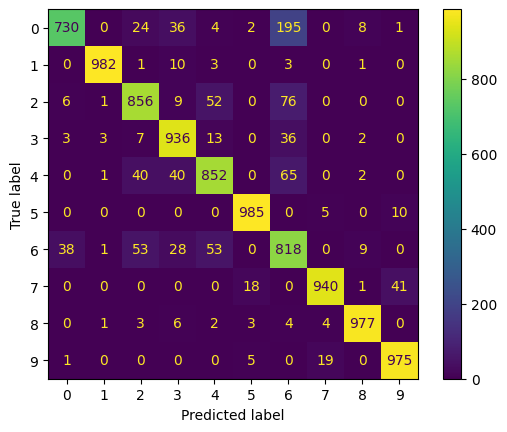

# Model 2

Do Modelu 1 dodajemy kolejną warstwę konwolucyjną.

Model sekwencyjny:
*   **Pierwsza warstwa** (DefaultConv2D): zawiera 64 filtry 3x3, która korzysta z funkcji aktywacji ReLU, parametry obrazu -> input_shape = [28,28,1],
*   **Maksymalizująca warstwa łącząca** (MaxPool2D) zawierającą jądro o rozmiarze domyślnym 2,
*   Warstwa porzucenia (Dropout) dla 25% połączeń,

*   Warstwa konwolucyjna (DefaultConv2D): zawiera 128 filtrów 3x3, która korzysta z funkcji aktywacji ReLU,  
*   Maksymalizująca warstwa łącząca (MaxPool2D) zawierającą jądro o rozmiarze domyślnym 2,
*   Warstwa porzucenia (Dropout) dla 25% połączeń,

*   Warstwa spłaszczona (Flatten),

*   Warstwa ukryta gęsta (Dense) składająca się z 128 jednostek, która korzysta z funkcji aktywacji ReLU,
*   **Warstwa wyjściowa** gęsta (Dense) składająca się z 10 jednostek z wyznaczoną funkcją aktywacji softmax

# **KOMPILOWANIE MODELU**

*  funkcja straty: categorical_crossentropy,
*  optymalizator: adam,
*  wskaźnik: accuracy


# **TRENOWANIE MODELU**

Należy wywołać metodę fit():

*   Cechy wejściowe (X_train)
*   Klasy docelowe (y_train)
*   Liczba epok (epochs) = 50
*   Batch_size = 256
*   Przebieg walidacyjny




# **KRZYWE UCZENIA**

# **OCENA MODELU**

# **PROGNOZY MODELU**

# Model 3

Należy użyć funkcji functools.partial() do zdefiniowania warstwy splotowej DefaultConv2D, która działa jak warstwa Conv2D, zawiera jednak inne parametry domyślne, rozmiar jądra równy 3, uzupełnienie zerami typu "same", funkcję aktywacji ReLU oraz inicjalizator He.

Model sekwencyjny:
*   **Pierwsza warstwa (DefaultConv2D)**: zawiera 64 filtry 7x7. Krok - wartość domyślna (1). Parametry obrazu, input_shape = [28,28,1],
*   **Maksymalizująca warstwa łącząca (MaxPool2D)** zawierającą jądro o rozmiarze domyślnym 2,

*   Dwie warstwy splotowe (DefaultConv2D): zawierające 128 filtrów, a po nich Maksymalizująca warstwa łącząca (MaxPool2D),

*   Dwie warstwy splotowe (DefaultConv2D): zawierające 256 filtrów, a po nich Maksymalizująca warstwa łącząca (MaxPool2D),

*   Warstwa spłaszczona (Flatten),

*   Warstwa ukryta gęsta (Dense) składająca się z 128 jednostek, która korzysta z funkcji aktywacji ReLU inicjalizatora He,
*   Warstwa porzucenia (Dropout) dla 50% połączeń,
*   Warstwa ukryta gęsta (Dense) składająca się z 64 jednostek, która korzysta z funkcji aktywacji ReLU oraz inicjalizatora He,
*   Warstwa porzucenia (Dropout) dla 50% połączeń,
*   **Warstwa wyjściowa** gęsta (Dense) składająca się z 10 jednostek z wyznaczoną funkcją aktywacji softmax



# **KOMPILOWANIE MODELU**

*  funkcja straty: categorical_crossentropy,
*  optymalizator: adam,
*  wskaźnik: accuracy




# **TRENOWANIE MODELU**

Należy wywołać metodę fit():
*   cechy wejściowe (X_train)
*   Klasy docelowe (y_train)
*   Liczba epok (epochs) = 5
*   Przebieg walidacyjny




# **KRZYWE UCZENIA**

Należy wykorzystać słownik (history.history). Krzywe uczenia: średnia funkcja straty uczenia i dokładność zmierzone w każdej epoce dla zestawu treningowego i walidacyjnego

# **OCENA MODELU**

# **PROGNOZY MODELU**

Architektury sieci splotowych:

*   LeNet5
*   AlexNet
*   GoogleLeNet
*   VGGNet
*   ResNet
*   Xception
*   SEnet
*   ResNeXt, DenseNet, ...